<a href="https://colab.research.google.com/github/BlackHole3344/PROJECT-S1/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [70]:
med_df = pd.read_csv("insurance.csv")


setting up matplotlib

In [71]:
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"]= (10 , 6)
plt.rcParams["figure.facecolor"] = "#00000000"

.describe() gives all the analytics view for our data

In [72]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [73]:
med_df.age.describe()
fig = px.histogram(med_df , x = "age"
                   , marginal = "box", color = "smoker" ,
                   nbins = 50
                    ,title = "distribution of age" ,
                   )
fig.update_layout(bargap = 0.2)

In [74]:
fig = px.histogram(med_df , x = "age" , y = "charges" , marginal = "box" , color = "smoker" , nbins = 47 , title = "age vs charges")
fig.update_layout(bargap = 0.2)

In [75]:
fig = px.histogram(med_df , x = "charges"  , marginal = "box" , color = "smoker" , color_discrete_sequence= ["green" , "black"] , nbins = 50 , title = "variation in charges wrt to smokers")
fig.update_layout(bargap = 0.2)

In [76]:
color_map = {"male": "blue", "female": "pink"}
fig = px.histogram(med_df , x = "sex" , y ="charges"  , color = "sex" , color_discrete_sequence= ["pink" , "yellow" , "green"  ] ,  marginal = "box" , nbins = 50 , title = "sex vs charges" )
fig.update_layout(bargap = 0.2)

In [77]:
med_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
fig = px.histogram(med_df , x = "region" , color = "sex" , marginal = "box" , nbins = 50 , title = "sex distribution in regions" )
fig.update_layout(bargap = 0.2)

In [79]:
plt.bar(med_df["sex"] , med_df["index"] , barWidth = 0.25 , color = "r")

KeyError: ignored

In [ ]:
fig = px.histogram(med_df , x = "smoker" , color = "sex" , marginal = "box" , nbins = 47 , title = "people count wrt gender and smoker")
fig.update_layout(bargap = 0.2)

In [ ]:
fig = px.scatter(med_df , x = "age" , y = "charges" ,
                 color = "smoker" , opacity = 0.8 ,
                 hover_data = ["sex"] , title = "age vs charges")
fig.update_traces(marker_size = 4)
fig.show()

Finding the correlation among each feature with the charges
can be done using : med_df.age.cor(med_df.charges)

In [ ]:
fig = px.scatter(med_df , x = "bmi" , y = "charges" , opacity = 0.8 ,color = "smoker", hover_data = ["sex"]  )
fig.update_traces(marker_size = 4)
fig.show()

In [ ]:
med_df.age.corr(med_df.charges)


In [ ]:
med_df.bmi.corr(med_df.charges)

In [ ]:
numeric_val = {"yes" : 1 , "no" : 0}
smoker_numeric = med_df.smoker.map(numeric_val)


In [ ]:
med_df.charges.corr(smoker_numeric)

In [ ]:
med_df.corr()

as we now know the age , smokers having the close correlation with the charges so we are considering this as an input features for our linear regression model

# New Section

In [ ]:
non_smokers = med_df[med_df.smoker == "no"]



In [ ]:
non_smokers.age


In [ ]:
px.scatter(non_smokers , x = "age" , y = "charges" , color = "sex")

In [ ]:
ages = non_smokers.age


In [ ]:
import numpy as np
ages = np.array(ages)

In [ ]:
ages.shape

In [ ]:
ages

In [ ]:
def simm(ages , w , b) :
  return w*ages + b
estimated_charges = simm(ages , w , b)

In [ ]:
plt.scatter( ages , non_smokers.charges , s = 8 , alpha = 0.9 )
plt.plot(ages , estimated_charges , "r")
plt.legend(["actual" , "estimated"])

RMSE :  8912.303166634889


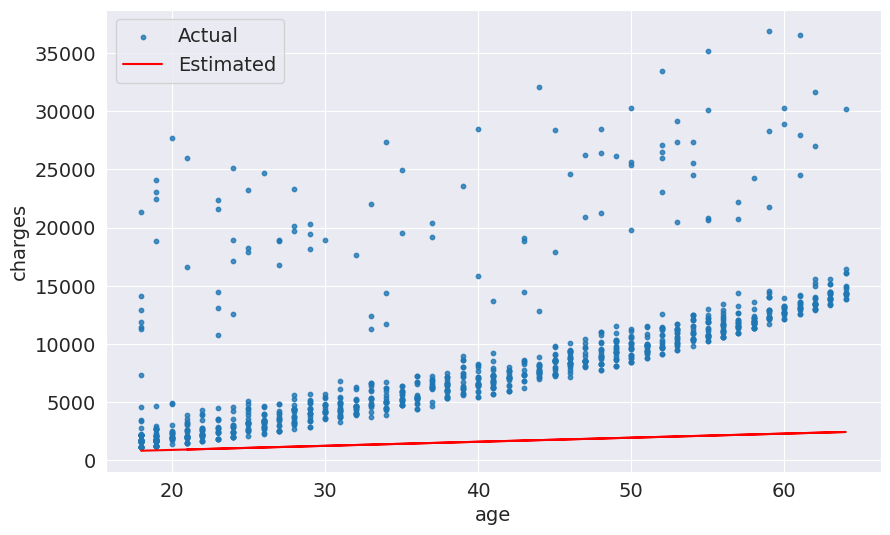

In [87]:
# function for tweaking the values

def take_para(w , b) :
  target = non_smokers.charges
  estimated_charges = simm(ages , w , b)


  plt.scatter(ages , target , s = 10 , alpha = 0.8)
  plt.plot(ages , estimated_charges , "r")
  plt.xlabel("age")
  plt.ylabel("charges")
  plt.legend(["Actual" , "Estimated"])
  loss = rmse(target , estimated_charges)
  print("RMSE : " ,loss)


take_para(35 , 200)

In [ ]:
# lets calculate the rmse (ROOT MEAN SQAURED ERROR) THE VALUE AT WHICH OUR EACH DATA POINT are differs

In [81]:
def rmse(target , prediction):
  return np.sqrt(np.mean(np.square(target - prediction)))

# w = 125
# b = 100
# target = non_smokers["charges"]
# prediction = simm(ages , w , b )

# # rmse(target , prediction)

In [83]:
# lets implement linear regression with sklearn

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [85]:
inputs = non_smokers[["age"]]
inputs
targets = non_smokers.charges
model.fit(inputs , targets)

LinearRegression()

In [86]:
model.predict(np.array([[20] , [23] , [34]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3253.55770006, 4055.30443855, 6995.0424797 ])

In [90]:
# getting the rmse for new predictions
predictions = model.predict(inputs)
rmse(targets , predictions )
# output = 4662  (4662$ is the error between our predicitons and actual values)


4662.505766636395

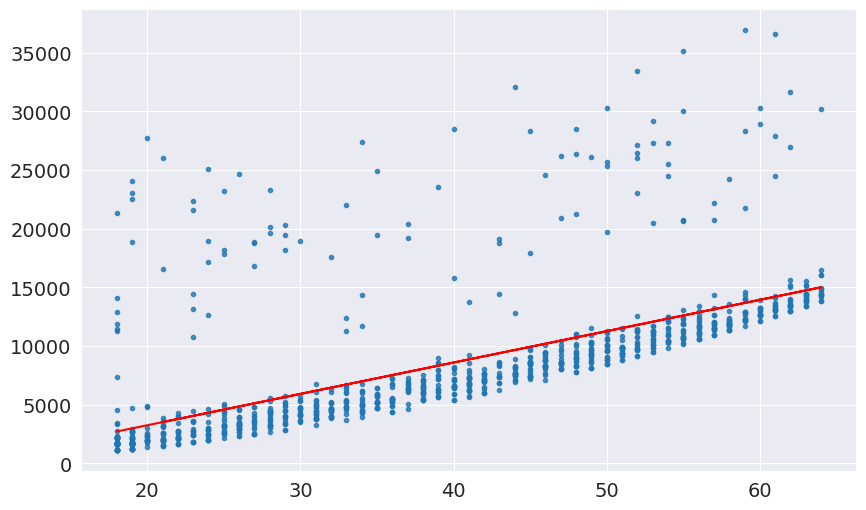

In [91]:
plt.scatter(ages , targets , s = 9 ,  alpha = 0.8)
plt.plot(ages , predictions , "r")

In [99]:
# using SGD

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor( max_iter = 1000 , random_state = 30)
reg.fit(inputs , targets)



SGDRegressor(random_state=30)

In [100]:
predictions_2 = reg.predict(inputs)

rmse(targets , predictions_2)

5676.576005711114

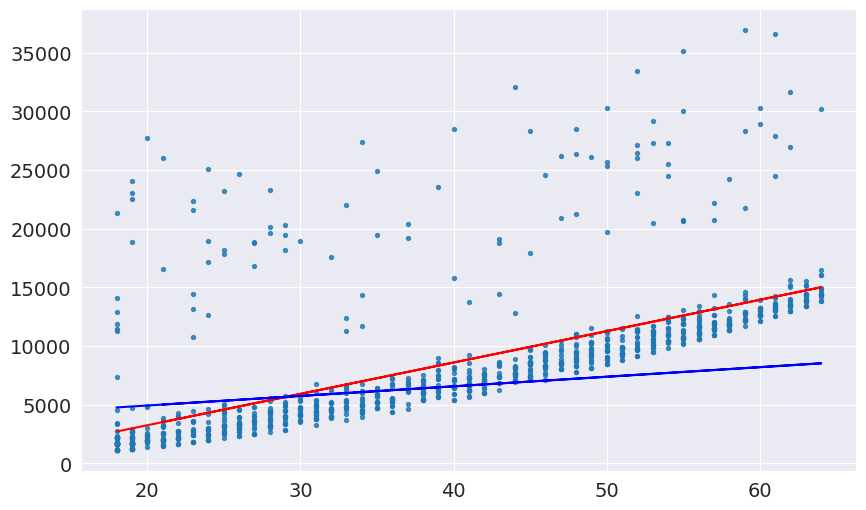

In [101]:
def draw(predictions_1   ,  targets):
  plt.scatter(ages , targets , s = 8 , alpha = 0.8)
  plt.plot(ages , predictions_1 , "r")
  # plt.plot(ages , predictions_2 , "b")

draw(predictions , targets )


In [ ]:
# Now estimating the charges for non_smokers

**Charges estimation for smokers**

In [102]:
smokers = med_df[med_df.smoker == "yes"]

In [104]:
smokers
px.scatter(smokers , x = "age" , y = "charges" , color = "sex")

In [106]:
targets2 = smokers.charges
ages2 = smokers.age

In [109]:
# putting into test with linear regression
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

inputs2 = smokers[["age"]]

inputs2

,age
0,19
11,62
14,27
19,30
23,34
...,...
1313,19
1314,30
1321,62
1323,42


In [110]:
model2.fit(inputs2 , targets2)

LinearRegression()

In [111]:
model2.predict([[23] , [45] , [29]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 34029.82022186, 29146.0185881 ])

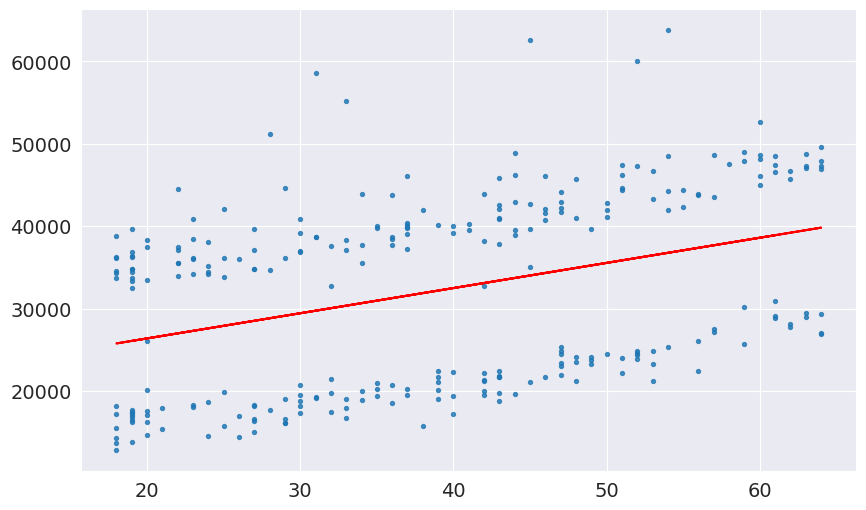

In [114]:
prediction2 = model2.predict(inputs2)
rmse(targets2 , prediction2)

plt.scatter(ages2 , targets2 , s = 8 , alpha = 0.8)
plt.plot(ages2 , prediction2 , "r")